# Partial Differential Equation and Gaussian Process

# 1 The Spatial Temporal Model

A model of post-transcriptional processing is formulated to describe the spatio-temporal Drosophila
protein expression data(Becker 2012). Protein production is considered to be linearly dependent on the 
concentration of mRNA at an earlier time point. The model also allows for diffusion of protein between
nuclei and linear protein decay. These processes are dependent on the diffusion parameter and the degradation 
rate of protein respectively.

\begin{equation}
 a \frac{\partial ^2 y_{x,t}}{\partial x^2} + b \frac{\partial y_{x,t}}{\partial t} + c y_{x,t}=  f_{x,t} 
\end{equation}

The coefficients a, b and c are unknown. In this study, we use Gaussian process with RBF kernel as a prior over $y_{x,t}$. The multi-output Gaussian process are developed by applying the partial differential operator on the spatial-temporal RBF kernel.

In [1]:
# Copyright (c) 2012, GPy authors (see AUTHORS.txt).
# Licensed under the BSD 3-clause license (see LICENSE.txt)
# model : a*d^2y/dx^2  + b * dy/dt + c * y = f
#  lengthscale for Yt : 
#  lengthscale for Yx : 
# variance for Yt  :  
# variance for Yx  : 

%pylab inline
%config InlineBackend.figure_format = 'svg'
import numpy as np
import pylab as pb
import GPy

Populating the interactive namespace from numpy and matplotlib


The spatiol-temporal multi-output partial differential equation kernel are developed with kernel name "GPy.kern.ODE_st" in GPy. The inputs are one dimension spatial data, one dimension temporal data and one dimension index which is used to indicate f and Y.

In [2]:
KY = GPy.kern.ODE_st(input_dim=3,a=1.,b=1,c=1,variance_Yx=1.,variance_Yt=1.,
    lengthscale_Yx=1.,lengthscale_Yt=1.) 

nd =10
t1 = 10*np.random.rand(nd)[:,None]
x1 = 10*np.random.rand(nd)[:,None]
inx = np.zeros(nd**2)[:,None]

T = np.kron(t1,np.ones(nd)[:,None])
S = np.kron(np.ones(nd)[:,None],x1)

inx[nd**2/2:nd**2]=1
X = np.hstack([T,S,inx])


#Y=np.sin(X[:,0:1])
#Y=np.sin(X[:,0:1])
Y = np.sin(X[:,0:1]) + np.cos(X[:,1:2])#*(1-X[:,1:2]) #+ np.random.randn(16,1)*0.1

Y[nd**2/2:nd**2] =  np.sin(X[nd**2/2:nd**2,0:1]) + np.cos(X[nd**2/2:nd**2,0:1]) + 2*np.cos(X[nd**2/2:nd**2,1:2])

In [3]:
m = GPy.models.GPRegression(X,Y,KY) 

# 2 Model Output

In order to test the kernel, we defined 

$y_{x,t} = cos(x) + sin(t)$

$f_{x,t} = sin(t) + cos(t) + 2cos(x)$

and a, b and c are equal to 1. With some arbitray choices of kernel parameters we plot the random field of f and y separatly.
The spatial variable can be fixed to certain value. It become easier to compare the true curve and our estimation.

 /home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/contour.py:967: UserWarning:The following kwargs were not used by contour: 'linewidth', 'label'


 /home/nbuser/anaconda2_501/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


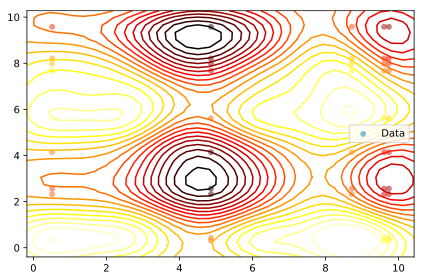

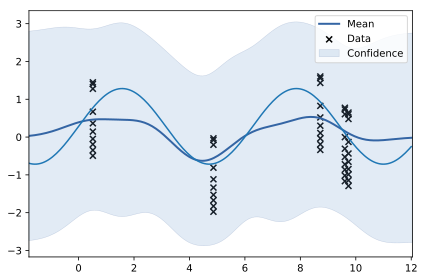

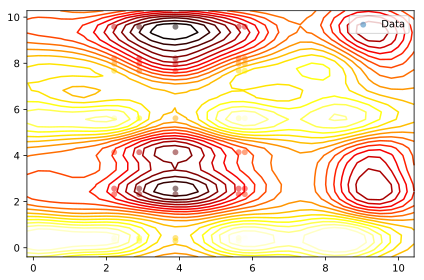

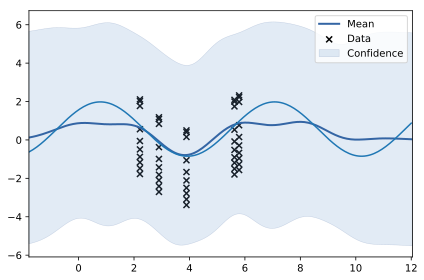

In [4]:
fixX = 5.
xplot = np.linspace(-2,12,200)
m.plot(fixed_inputs=[(2,0)], which_data_rows = slice(0,nd**2/2))
m.plot(fixed_inputs=[(1,fixX),(2,0)], which_data_rows = slice(0,nd**2/2))
pb.plot(xplot,np.cos(fixX) + np.sin(xplot))

m.plot(fixed_inputs=[(2,1)], which_data_rows = slice(nd**2/2,nd**2))
m.plot(fixed_inputs=[(1,fixX),(2,1)], which_data_rows = slice(nd**2/2,nd**2))
pb.plot(xplot,np.cos(xplot) + np.sin(xplot) + 2*np.cos(fixX))

In [5]:
m.optimize()

In [6]:
print m


Name : GP regression
Objective : -316.891724445
Number of Parameters : 8
Number of Optimization Parameters : 8
Updates : True
Parameters:
  GP_regression.           |              value  |  constraints  |  priors
  ode_st.a                 |     0.927831276506  |      +ve      |        
  ode_st.b                 |     0.878872529752  |      +ve      |        
  ode_st.c                 |      1.07222979737  |      +ve      |        
  ode_st.variance_Yt       |      5.87569800896  |      +ve      |        
  ode_st.variance_Yx       |      5.87569800896  |      +ve      |        
  ode_st.lengthscale_Yt    |       12.464230291  |      +ve      |        
  ode_st.lengthscale_Yx    |       12.713259674  |      +ve      |        
  Gaussian_noise.variance  |  1.74044285035e-16  |      +ve      |        


After optimization, the estimated value of a, b and c are printed. It is quite close to the true parameters we used to generate the testing data. The plot of the random fields are plotted below.

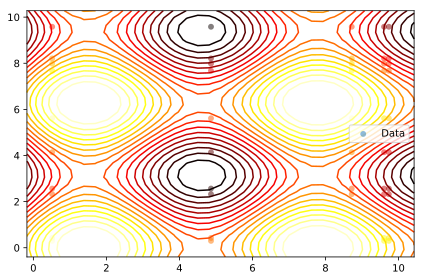

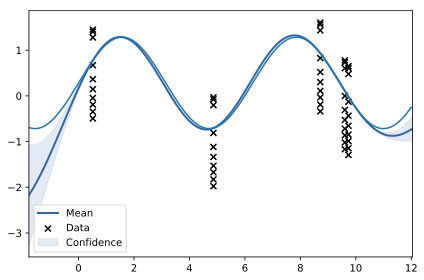

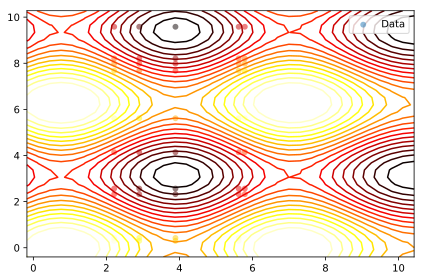

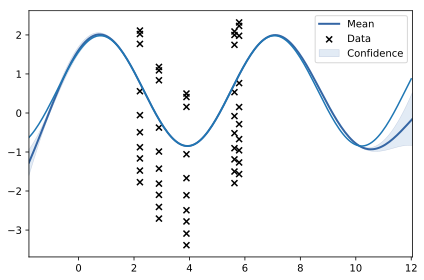

In [7]:
fixX = 5.
xplot = np.linspace(-2,12,200)
m.plot(fixed_inputs=[(2,0)], which_data_rows = slice(0,nd**2/2))
m.plot(fixed_inputs=[(1,fixX),(2,0)], which_data_rows = slice(0,nd**2/2))
pb.plot(xplot,np.cos(fixX) + np.sin(xplot))

m.plot(fixed_inputs=[(2,1)], which_data_rows = slice(nd**2/2,nd**2))
m.plot(fixed_inputs=[(1,fixX),(2,1)], which_data_rows = slice(nd**2/2,nd**2))
pb.plot(xplot,np.cos(xplot) + np.sin(xplot) + 2*np.cos(fixX))

The true random field is plotted below

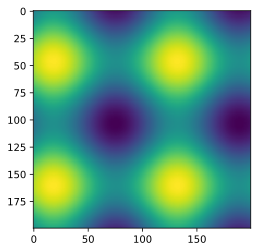

In [8]:
xplot = np.linspace(-1,10,200)
#pb.plot(xplot,np.sin(xplot))
PP = np.zeros((xplot.shape[0], xplot.shape[0]))
QQ = np.zeros((xplot.shape[0], xplot.shape[0]))

for i in range(0,200):
    for j in range(0,200):
        PP[i,j] = np.sin(xplot[i]) + np.cos(xplot[j])
        QQ[i,j] = np.sin(xplot[i]) + np.cos(xplot[i]) + 2*np.cos(xplot[j])

pb.figure()
pb.imshow(PP)